## Creadit cards data analysis using SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split

### Read the data from CSV

In [2]:
data = pd.read_csv("UCI_Credit_Card.csv")
cards_df = pd.DataFrame(data=data)
cards_df = cards_df.head(100)
cards_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Check data for any null or missing values

In [3]:
cards_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### EDA

<AxesSubplot:title={'center':'Correlations matrix'}>

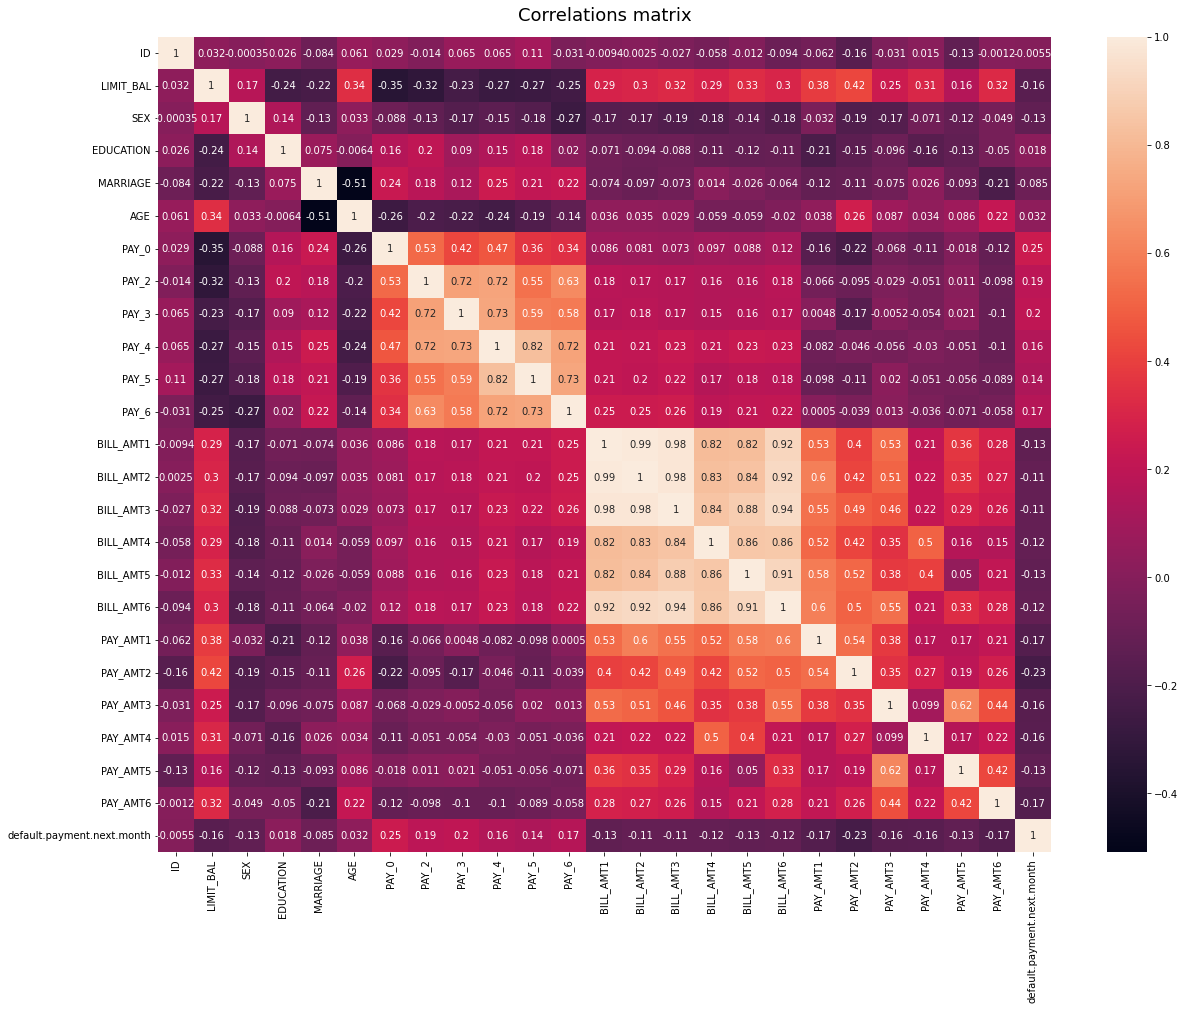

In [4]:
correlations = cards_df.corr(method="pearson")

plt.figure(figsize=(20,15))
plt.title('Correlations matrix', fontdict={'fontsize':18}, pad=16);
sn.heatmap(data=correlations, annot=True)

<AxesSubplot:>

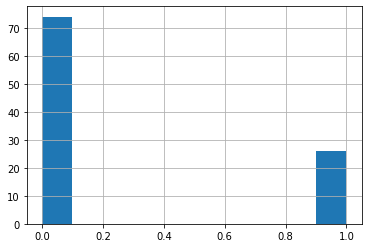

In [5]:
cards_df["default.payment.next.month"].hist()

### Train the model

In [9]:
from sklearn.svm import SVC

X = cards_df.drop("default.payment.next.month", axis=1)
y = cards_df["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = SVC()
model.fit(X_train, y_train)

0.8

<AxesSubplot:>

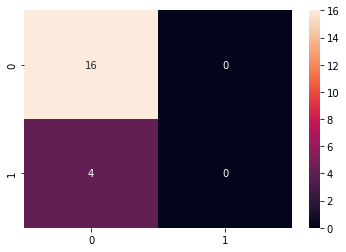

In [7]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)

sn.heatmap(data=cm, annot=True)